In [23]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv('final_csv_test.csv')

In [25]:
df.tail()

,id,EDA,TEMP,BVP,HR
451265,S35,0.229625,99999.0,3.92,99999.0
451266,S35,0.229625,99999.0,9.85,99999.0
451267,S35,0.228344,99999.0,14.94,99999.0
451268,S35,0.229625,99999.0,19.16,99999.0
451269,S35,0.228344,99999.0,22.43,99999.0


In [26]:
df.isna().sum()

id      0
EDA     0
TEMP    0
BVP     0
HR      0
dtype: int64

In [27]:
# REPLACE 99999 by N/A for simplifiaction
df.replace(99999.0, 'na', inplace=True)

In [28]:
df.isnull().sum()

id      0
EDA     0
TEMP    0
BVP     0
HR      0
dtype: int64

In [29]:
df.head()

,id,EDA,TEMP,BVP,HR
0,S02,4.000000,4.0,64.0,1.0
1,S02,0.000000,34.79,-0.0,118.0
2,S02,0.622764,34.79,-0.0,113.5
3,S02,0.759875,34.79,-0.0,93.0
4,S02,0.883157,34.79,-0.0,93.25


In [30]:
na_count = (df == 'na').mean()
na_count

id      0.000000
EDA     0.000000
TEMP    0.000412
BVP     0.000000
HR      0.750695
dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451270 entries, 0 to 451269
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      451270 non-null  object 
 1   EDA     451270 non-null  float64
 2   TEMP    451270 non-null  object 
 3   BVP     451270 non-null  float64
 4   HR      451270 non-null  object 
dtypes: float64(2), object(3)
memory usage: 17.2+ MB


In [32]:
target_column = 'HR'
df[target_column] = df[target_column].apply(lambda x: np.random.uniform(90, 180) if x == "na" else x)

# impute TEMP column
# Replace 'na' strings with np.nan in column 'A'
df['TEMP'] = df['TEMP'].replace('na', np.nan)

# Impute missing values in column 'A' using the mean of column 'A'
df['TEMP'] = df['TEMP'].fillna(df['TEMP'].mean())

# # Save the updated DataFrame back to the same CSV file
# file_path = 'combined_csv_test_HR.csv'
# df.to_csv(file_path, index=False)

In [33]:
df.tail()

,id,EDA,TEMP,BVP,HR
451265,S35,0.229625,31.29009,3.92,123.349320
451266,S35,0.229625,31.29009,9.85,125.221031
451267,S35,0.228344,31.29009,14.94,118.387630
451268,S35,0.229625,31.29009,19.16,135.164628
451269,S35,0.228344,31.29009,22.43,174.590210


In [34]:
na_count = (df == 'na').mean()
na_count

id      0.0
EDA     0.0
TEMP    0.0
BVP     0.0
HR      0.0
dtype: float64

<Axes: >

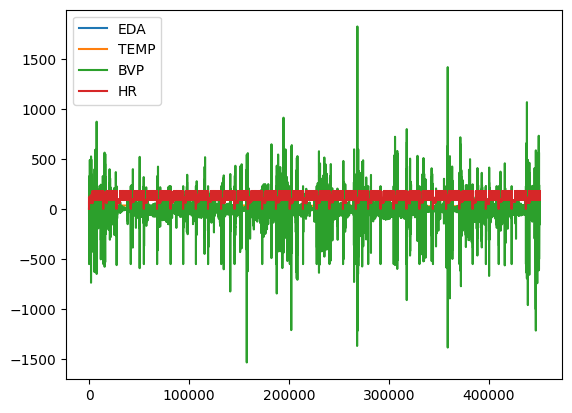

In [35]:
df.plot()

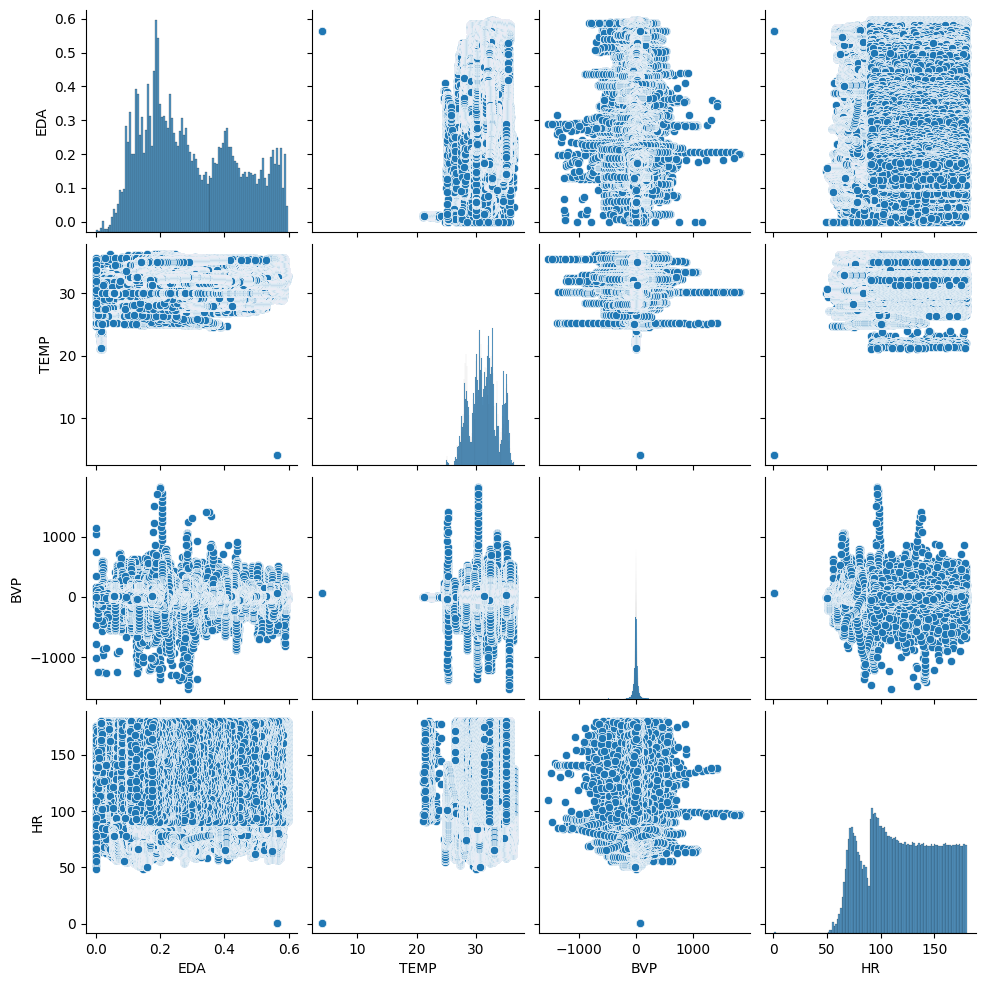

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

# Show the plot
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451270 entries, 0 to 451269
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      451270 non-null  object 
 1   EDA     451270 non-null  float64
 2   TEMP    451270 non-null  float64
 3   BVP     451270 non-null  float64
 4   HR      451270 non-null  float64
dtypes: float64(4), object(1)
memory usage: 17.2+ MB


In [41]:
na_count = (df == 'na').sum()
na_count

id      0
EDA     0
TEMP    0
BVP     0
HR      0
dtype: int64

In [42]:
df.describe()

,EDA,TEMP,BVP,HR
count,451270.000000,451270.000000,451270.000000,451270.000000
mean,0.300420,31.290090,0.023578,121.328785
std,0.147762,2.336219,67.463498,33.312784
min,-0.000000,4.000000,-1531.900000,1.000000
25%,0.181599,29.690000,-13.710000,94.168788
50%,0.270507,31.310000,1.300000,120.258979
75%,0.419396,32.810000,15.620000,150.041745
max,0.596332,36.390000,1822.090000,179.999867


In [ ]:
# Skewed data to normal data

from scipy import stats
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=False)
df['EDA'] = pt.fit_transform(df[['EDA']])

In [43]:
from ydata_profiling import ProfileReport

# Read the CSV file into a dataframe
#df = pd.read_csv(r'C:\Users\sahus\Stress-Prediction\final_csv_test.csv')

# Generate a profiling report
profile = ProfileReport(df, title="Data Profile Report", explorative=True)

# Save the report to an HTML file
profile.to_file("data_profile.html")

print("The profiling report has been generated!")


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 215.22it/s]

The profiling report has been generated!
